<a href="https://colab.research.google.com/github/mpintoponce/python_utec/blob/main/Modulo03%3AVisualizacion_de_Datos/04.Sesion_3_Conceptos_Simpy_y_ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![picture](https://drive.google.com/uc?export=view&id=1KaUW3_JAieeY7WVNfoRiTSr2JsaeAcXi)

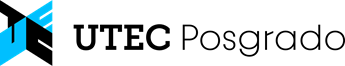

# Conceptos Básicos de Simpy
Para emplear SimPy de forma eficaz, es fundamental comprender ciertos conceptos básicos que sustentan esta biblioteca de simulación de eventos discretos. A continuación, se enumeran los siguientes conceptos:



1.   Environment (Entorno) y Scheduler (Planificador)
2.   Proceso
3.   Yield (Ceder) y Timeout (Espera)
4.   Request (Solicitud)
5.   Release (Liberar)



In [2]:
# instalar simpy
!pip install simpy

## 1. Environment (Entorno) y Scheduler (Planificador)

**Entorno** es el núcleo de una simulación en SimPy.
Gestiona la cola de eventos y avanza el tiempo de simulación.
Todos los procesos y eventos se ejecutan dentro de un entorno.

**Scheduler** es el componente interno del Environment que organiza y gestiona la ejecución de los eventos en la cola de eventos. Se asegura de que los eventos se procesen en el orden correcto y en el momento adecuado.



```python
import simpy

# La simulación comienza con la creación de un entorno que incluye el scheduler.
env = simpy.Environment()
```


In [3]:
import simpy

# La simulación comienza con la creación de un entorno que incluye el scheduler.
env = simpy.Environment()

# 2. Process (Proceso)
Los procesos en SimPy son funciones generadoras (funciones que contienen `yield`) que simulan el comportamiento de las entidades. Los procesos pueden esperar eventos, generar otros procesos y utilizar recursos.



```python
def mi_proceso(env):
    yield env.timeout(1) # es proceso espera una unidad de tiempo
    print('Proceso ejecutado en el tiempo', env.now)

env.process(mi_proceso(env))

```



In [ ]:
def mi_proceso(env):
    yield env.timeout(1) # es proceso espera una unidad de tiempo # Yield: Es el que me va a activar el evento.
    print('Proceso ejecutado en el tiempo', env.now)

env.process(mi_proceso(env))

# 3. Yield (Ceder) y Timeout (Espera)
La palabra clave `yield` se utiliza en las funciones generadoras o proceso para ceder el control al scheduler. Cuando un proceso ejecuta `yield`, indica que debe esperar a que ocurra un evento (por ejemplo, timeout o resource request).


La palabra clave `timeout` es un tipo de evento que hace que un proceso espere un período de tiempo específico.
Se usa con `yield env.timeout(tiempo)`.

```python
def mi_proceso(env):
    print('Iniciando el proceso en', env.now) #08:00
    yield env.timeout(5) # espero 5min
    print('Proceso reanudado en', env.now) # Me voy 08:05hrs
```



In [ ]:
# env.now: me da la hora actual
# Yield me permite contabilizar 5min
# Tiemout: es el tiempo que voy a esperar para irme.

## 4. Resource (Recurso)
Los recursos (`Resource`) en SimPy son utilizados para modelar recursos compartidos que los procesos deben solicitar y liberar. Los ejemplos incluyen servidores, máquinas, y en el caso de una tienda, los cajeros.

**Capacity**

La capacidad determina cuántos recursos están disponibles.

- Ejemplo con `capacity=1`: Si un proceso está usando el recurso, cualquier otro proceso que quiera usarlo tendrá que esperar hasta que el recurso esté disponible nuevamente.
- Ejemplo con `capacity=2`: Hay dos unidades del recurso disponibles. Si ambas unidades están ocupadas, un tercer proceso tendrá que esperar hasta que al menos una de las unidades esté disponible.


```python
 # Recurso con capacidad de 2. Dos procesos pueden usar el recurso al mismo tiempo.
recurso = simpy.Resource(env, capacity=2) # Por ejemplo 02 cajeros
```


## 5. Request (Solicitud)
Para usar un recurso, un proceso debe crear una solicitud (`request`).
Esta solicitud debe ser cedida con `yield`.
Una vez que el recurso está disponible, el proceso continúa.


```python
with recurso.request() as req:              # Solicitar acceso al recurso (un servidor, un cajero, una máquina, etc)
    yield req                               # Esperar hasta que el recurso esté disponible
    print('Recurso obtenido en', env.now)   # Imprimir el tiempo en que se obtiene el recurso


```

## 6. Release (Liberar)
Después de usar un recurso, el proceso debe liberar el recurso para que otros procesos puedan usarlo.

```python

with recurso.request() as req:
    yield req
    print('Recurso obtenido en', env.now)
    yield env.timeout(3)                      # Uso del recurso por 3 unidades de tiempo
print('Recurso liberado en', env.now)         # <-- En este punto el recurso fue liberado

```

# Ejemplo de un proceso simple - paso 1

In [4]:
import simpy

# 4 Definir un proceso simple
def proceso_simple(env):
    print(f'Iniciando el proceso en el tiempo {env.now}')
    yield env.timeout(5)  # Espera 5 unidades de tiempo
    print(f'Proceso reanudado en el tiempo {env.now}')

# 1. Crear el entorno de simulación
env = simpy.Environment() # ya incluye el scheduler.

# 2. Añadir el proceso al entorno
env.process(proceso_simple(env))

# 3. Ejecutar la simulación
env.run(until=10)  # Ejecutar hasta el tiempo 10

print("Simulación completada.")


Iniciando el proceso en el tiempo 0
Proceso reanudado en el tiempo 5
Simulación completada.


# Ejemplo simple con Colas (FIFO)

En este ejemplo, añadimos el concepto de `capacity`, que denota la cantidad de recursos disponibles.

In [5]:
import simpy

# 4. Defino el proceso
def proceso(env, nombre, recurso):
    with recurso.request() as req:
        print(f'{nombre} solicita el recurso en {env.now}')
        yield req
        print(f'{nombre} obtiene el recurso en {env.now}')
        yield env.timeout(2) # Le estoy diciendo que se demoran 02 minutos en atender al cliente. Debería ser con randint.exponential para que sea más humado.
        print(f'{nombre} libera el recurso en {env.now}')
        #print('*'*10)

# 1. Paso 1
env = simpy.Environment()
recurso = simpy.Resource(env, capacity=2) # un solo recurso disponible

# 2. Añade el proceso al entorno
# Crear varios procesos
for i in range(5):
    env.process(proceso(env, f'Cliente {i}', recurso))

# 3. Ejecuta la simulación
env.run()


Cliente 0 solicita el recurso en 0
Cliente 1 solicita el recurso en 0
Cliente 2 solicita el recurso en 0
Cliente 3 solicita el recurso en 0
Cliente 4 solicita el recurso en 0
Cliente 0 obtiene el recurso en 0
Cliente 1 obtiene el recurso en 0
Cliente 0 libera el recurso en 2
Cliente 1 libera el recurso en 2
Cliente 2 obtiene el recurso en 2
Cliente 3 obtiene el recurso en 2
Cliente 2 libera el recurso en 4
Cliente 3 libera el recurso en 4
Cliente 4 obtiene el recurso en 4
Cliente 4 libera el recurso en 6


# Ejemplo: Barbería

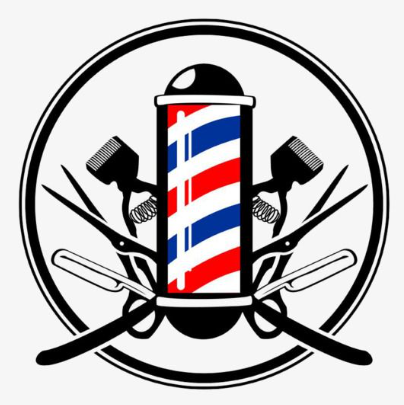



En este ejemplo, usamos `capacity = 2` denotando que  cantidad de recursos disponibles son mayor a 1, podemos cambiar estos valores y analizar cuantos clientes logran ser atendidos.

También añadimos el factor de `intervalo_llegadas`, que nos permite definir el tiempo promedio entre las llegadas consecutivas de los clientes, ayudando a modelar la frecuencia con la que los clientes llegan a la barbería y así evaluar cómo este factor afecta el tiempo de espera y la eficiencia del servicio.

Para nuestra simulación tendremos 2 barberos disponibles.
Los barberos podrán atender hasta 10 clientes en un tiempo de 100 unidades (`until=100`).

**Nota:** Pueden ser atendidos menos clientes debido a diferentes factores, como la variabilidad en los tiempos de llegada de los clientes, la duración del servicio, o tiempos de espera prolongados que ocurren cuando ambos barberos están ocupados simultáneamente.

In [6]:
import simpy
import random

def Proceso_cliente(env, name, personal):
    print(f'{name} llegó a la barberia en el minuto {env.now:.2f}')

    with personal.request() as req:             # Solicitar un recurso (barbero), si al menos un barbero está desocupado el cliente podrá ser atendido, sino tendra que espera
        yield req
        print(f'{name} está siendo atendido en el minuto {env.now:.2f}')
        # Se genera un tiempo aleatorio para simular la duracion del corte
        tiempo_corte = random.randint(15, 30)       # random.randint() es una distribución uniforme discreta. Cualquier número entero entre 15 y 30 (ambos inclusive) tiene la misma probabilidad de ser seleccionado.
        yield env.timeout(tiempo_corte)
        print(f'{name} terminó en el minuto {env.now:.2f}')

# Función principal que genera clientes en el entorno de simulación
def principal(env, num_clientes, intervalo_llegadas, personal):

    # Para cada cliente en el rango de num_clientes
    for i in range(num_clientes):

        # Genera un tiempo de espera antes de que llegue el próximo cliente
        # La espera es modelada usando una distribución exponencial usando random.expovariate porque es adecuada para representar
        # tiempos entre eventos que ocurren de manera independiente y a una tasa constante.
        # La tasa de llegada es 1.0 / intervalo_llegadas
        yield env.timeout(random.expovariate(1.0 / intervalo_llegadas))

        # Una vez que el tiempo de espera ha transcurrido, crea un nuevo proceso de cliente
        # El proceso de cliente se maneja por la función cliente
        # Se pasa el entorno, un nombre único para el cliente y el recurso personal (barberos)
        env.process( Proceso_cliente(env, f'Cliente {i}', personal) )

# Configuración de la simulación
random.seed(42)

# Paso 1: Genero el enviroment
env = simpy.Environment()

# Paso 2: Asigno recursos
personal = simpy.Resource(env, capacity=2)  # 2 barberos disponibles

# Paso 3: Proceso
env.process(principal(env, num_clientes=10, intervalo_llegadas=10, personal=personal))  # factor intervalo_llegadas

# Paso 4: Ejecuta la simulación
env.run(until=100)                          #  la simulación debe ejecutarse hasta el tiempo 100.

print("Simulación completada.")


Cliente 0 llegó a la barberia en el minuto 10.20
Cliente 0 está siendo atendido en el minuto 10.20
Cliente 1 llegó a la barberia en el minuto 10.45
Cliente 1 está siendo atendido en el minuto 10.45
Cliente 2 llegó a la barberia en el minuto 13.26
Cliente 3 llegó a la barberia en el minuto 26.60
Cliente 1 terminó en el minuto 29.45
Cliente 2 está siendo atendido en el minuto 29.45
Cliente 0 terminó en el minuto 33.20
Cliente 3 está siendo atendido en el minuto 33.20
Cliente 4 llegó a la barberia en el minuto 37.89
Cliente 5 llegó a la barberia en el minuto 38.21
Cliente 6 llegó a la barberia en el minuto 39.20
Cliente 7 llegó a la barberia en el minuto 41.85
Cliente 2 terminó en el minuto 46.45
Cliente 4 está siendo atendido en el minuto 46.45
Cliente 8 llegó a la barberia en el minuto 51.06
Cliente 3 terminó en el minuto 61.20
Cliente 5 está siendo atendido en el minuto 61.20
Cliente 9 llegó a la barberia en el minuto 63.65
Cliente 4 terminó en el minuto 67.45
Cliente 6 está siendo ate

# Notas para los ejercícios para casa

## Funciones de Distribución


- Uniforme
```
random.randint(30, 60)   # Necesita dos valores que representen un rango
```


- Normal
```
# Genera un tiempo con distribución normal (media=10, desviación estándar=2)
random.normalvariate(10, 2)
```


- Exponencial
```
random.expovariate(1.0 /INTERVALO_LLEGADA)
```



## Capturar el tiempo actual
```
env.now
```



In [ ]:
import random

print(random.randint(8, 12))